#**Sales Forecasting Dataset "Process of Estimating Future Sales"**

Companies focused on their forecasts:

1.   Past sales data
2.   Industry comparisons
3.   Economic trends





1. **Stores:** Anonymized information about the 45 stores, 
indicating the type and size of store

2. **Features:** Contains additional data related to the store, department, and regional activity for the given dates.

*  Store - the store number
*  Date - the week
*  Temperature - average temperature in the region
*  Fuel_Price - cost of fuel in the region
*  MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
*  CPI - the consumer price index
*  Unemployment - the unemployment rate
*  IsHoliday - whether the week is a special holiday week

3. **Sales:** Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

*  Store - the store number
*  Dept - the department number
*  Date - the week
*  Weekly_Sales - sales for the given department in the given store
*  IsHoliday - whether the week is a special holiday week


#1. Download Dataset API Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Semestre_2/Data_Science/dataset

/content/drive/MyDrive/Semestre_2/Data_Science/dataset


In [2]:
!pip install kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dianacabrera20","key":"fd150cb868b99129c0e4cce2465dd6e3"}'}

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              224KB  2021-04-24 17:07:26           3672  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           2118  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            446  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1361  
mathurinache/twitter-edge-nodes                             Twitter Edge Nod

In [9]:
!kaggle datasets download -d manjeetsingh/retaildataset

  0% 0.00/3.11M [00:00<?, ?B/s]
100% 3.11M/3.11M [00:00<00:00, 103MB/s]


In [10]:
cd drive/MyDrive/Semestre_2/Data_Science/

/content/drive/MyDrive/Semestre_2/Data_Science


In [11]:
!unzip /content/retaildataset.zip -d /content/drive/MyDrive/Semestre_2/Data_Science/dataset

Archive:  /content/retaildataset.zip
  inflating: /content/drive/MyDrive/Semestre_2/Data_Science/dataset/Features data set.csv  
  inflating: /content/drive/MyDrive/Semestre_2/Data_Science/dataset/sales data-set.csv  
  inflating: /content/drive/MyDrive/Semestre_2/Data_Science/dataset/stores data-set.csv  


#2. Initial Exploration

In [12]:
!head -50 /content/drive/MyDrive/Semestre_2/Data_Science/dataset/Features-dataset.csv

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0963582,8.106,FALSE
1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2421698,8.106,TRUE
1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891429,8.106,FALSE
1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196429,8.106,FALSE
1,05/03/2010,46.5,2.625,NA,NA,NA,NA,NA,211.3501429,8.106,FALSE
1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806429,8.106,FALSE
1,19/03/2010,54.58,2.72,NA,NA,NA,NA,NA,211.215635,8.106,FALSE
1,26/03/2010,51.45,2.732,NA,NA,NA,NA,NA,211.0180424,8.106,FALSE
1,02/04/2010,62.27,2.719,NA,NA,NA,NA,NA,210.8204499,7.808,FALSE
1,09/04/2010,65.86,2.77,NA,NA,NA,NA,NA,210.6228574,7.808,FALSE
1,16/04/2010,66.32,2.808,NA,NA,NA,NA,NA,210.4887,7.808,FALSE
1,23/04/2010,64.84,2.795,NA,NA,NA,NA,NA,210.4391228,7.808,FALSE
1,30/04/2010,67.41,2.78,NA,NA,NA,NA,NA,210.3895456,7.808,FALSE
1,07/05/2010,72.55,2.835,NA,NA,NA,NA,NA,210.3399684,7.808,FALSE
1,

In [13]:
!head -50 /content/drive/MyDrive/Semestre_2/Data_Science/dataset/sales-dataset.csv

Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,05/02/2010,24924.5,FALSE
1,1,12/02/2010,46039.49,TRUE
1,1,19/02/2010,41595.55,FALSE
1,1,26/02/2010,19403.54,FALSE
1,1,05/03/2010,21827.9,FALSE
1,1,12/03/2010,21043.39,FALSE
1,1,19/03/2010,22136.64,FALSE
1,1,26/03/2010,26229.21,FALSE
1,1,02/04/2010,57258.43,FALSE
1,1,09/04/2010,42960.91,FALSE
1,1,16/04/2010,17596.96,FALSE
1,1,23/04/2010,16145.35,FALSE
1,1,30/04/2010,16555.11,FALSE
1,1,07/05/2010,17413.94,FALSE
1,1,14/05/2010,18926.74,FALSE
1,1,21/05/2010,14773.04,FALSE
1,1,28/05/2010,15580.43,FALSE
1,1,04/06/2010,17558.09,FALSE
1,1,11/06/2010,16637.62,FALSE
1,1,18/06/2010,16216.27,FALSE
1,1,25/06/2010,16328.72,FALSE
1,1,02/07/2010,16333.14,FALSE
1,1,09/07/2010,17688.76,FALSE
1,1,16/07/2010,17150.84,FALSE
1,1,23/07/2010,15360.45,FALSE
1,1,30/07/2010,15381.82,FALSE
1,1,06/08/2010,17508.41,FALSE
1,1,13/08/2010,15536.4,FALSE
1,1,20/08/2010,15740.13,FALSE
1,1,27/08/2010,15793.87,FALSE
1,1,03/09/2010,16241.78,FALSE
1,1,10/09/2010,18194.74,TRUE
1,1,17

In [14]:
!head -50 /content/drive/MyDrive/Semestre_2/Data_Science/dataset/stores-dataset.csv

Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505
7,B,70713
8,A,155078
9,B,125833
10,B,126512
11,A,207499
12,B,112238
13,A,219622
14,A,200898
15,B,123737
16,B,57197
17,B,93188
18,B,120653
19,A,203819
20,A,203742
21,B,140167
22,B,119557
23,B,114533
24,A,203819
25,B,128107
26,A,152513
27,A,204184
28,A,206302
29,B,93638
30,C,42988
31,A,203750
32,A,203007
33,A,39690
34,A,158114
35,B,103681
36,A,39910
37,C,39910
38,C,39690
39,A,184109
40,A,155083
41,A,196321
42,C,39690
43,C,41062
44,C,39910
45,B,118221

#3. Dataframe Exploration

##3.1 Libraries

In [46]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import HTML
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, date
import math

In [4]:
# Importing the most popular regression libraries.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

##3.2 Features Dataset

In [5]:
df_features = pd.read_csv('/content/drive/MyDrive/Semestre_2/Data_Science/dataset/Features-dataset.csv', sep = ',', low_memory= False)
df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [42]:
df_features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


##3.3 Sales Dataset

In [6]:
df_sales = pd.read_csv('/content/drive/MyDrive/Semestre_2/Data_Science/dataset/sales-dataset.csv', sep = ',', low_memory= False)
df_sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [23]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


##3.4 Stores Dataset

In [7]:
df_stores = pd.read_csv('/content/drive/MyDrive/Semestre_2/Data_Science/dataset/stores-dataset.csv', sep = ',', low_memory= False)
df_stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [24]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


## 3.5 Merge dataset and formed new dataframes

### Sales + Store + Features Dataframe

In [10]:
df_new = df_sales.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
print(df_new.shape)

(421570, 17)


In [30]:
df_new.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


### Sales + Store Dataframe

In [11]:
df_sales_store = df_sales.merge(df_stores, on=['Store'], how='inner')
print(df_sales_store.shape)

(421570, 7)


In [42]:
df_sales_store.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


###Sales + Features Dataframe

In [12]:
df_sales_features = pd.merge(df_features, df_sales, on = ['Store','Date','IsHoliday'], how = 'inner')
# merging(adding) all stores info with new sales features
final_sales_features = pd.merge(df_sales_features, df_stores, how = 'inner',on=['Store'])
# sorting data with respect to date
df_sales_features = final_sales_features.sort_values(by = 'Date')

In [66]:
df_sales_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
261048,27,01/04/2011,37.27,3.811,NaN,NaN,NaN,NaN,NaN,137.955893,7.725,False,20,9880.30,A,204184
33836,4,01/04/2011,56.99,3.521,NaN,NaN,NaN,NaN,NaN,128.719935,5.946,False,4,51382.98,A,205863
33835,4,01/04/2011,56.99,3.521,NaN,NaN,NaN,NaN,NaN,128.719935,5.946,False,3,11476.27,A,205863
33834,4,01/04/2011,56.99,3.521,NaN,NaN,NaN,NaN,NaN,128.719935,5.946,False,2,87803.95,A,205863
33833,4,01/04/2011,56.99,3.521,NaN,NaN,NaN,NaN,NaN,128.719935,5.946,False,1,33809.56,A,205863


## 3.6 Check missing values for each column

### Features dataframe:

We see that there are some missing values for MarkDown 1 to MarkDown5, Unemployment and CPI.

In [11]:
df_features.isnull().sum().sort_values(ascending = False)

MarkDown2       5269
MarkDown4       4726
MarkDown3       4577
MarkDown1       4158
MarkDown5       4140
Unemployment     585
CPI              585
IsHoliday          0
Fuel_Price         0
Temperature        0
Date               0
Store              0
dtype: int64

### Sales dataframe:

In [12]:
df_sales.isnull().sum().sort_values(ascending = False)

IsHoliday       0
Weekly_Sales    0
Date            0
Dept            0
Store           0
dtype: int64

### Stores dataframe:

In [13]:
df_stores.isnull().sum().sort_values(ascending = False)

Size     0
Type     0
Store    0
dtype: int64

#4. Store Analysis

## 4.1 Group by types of stores: Type 1, Type 2 and Type 3

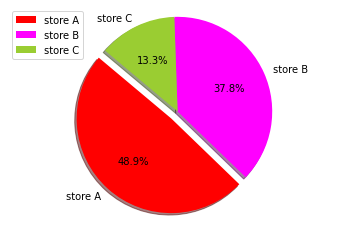

In [14]:
#pie-chart for the visual representation of store types
#https://pythonspot.com/matplotlib-pie-chart/
# Data to plot
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['red', 'magenta', 'yellowgreen']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

##4.2 Store by Size

In [18]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [26]:
labels = df_stores['Store'].tolist()
values = df_stores['Size'].tolist()

#configure_plotly_browser_state()
fig = px.pie(df_stores, values=values, names=labels)
fig.update_traces(textposition='inside', )
fig['layout'].update(height=500, width=700, title='Store by Size')
fig.show();

## 4.3 Size by types of stores: Type A, Type B and Type C

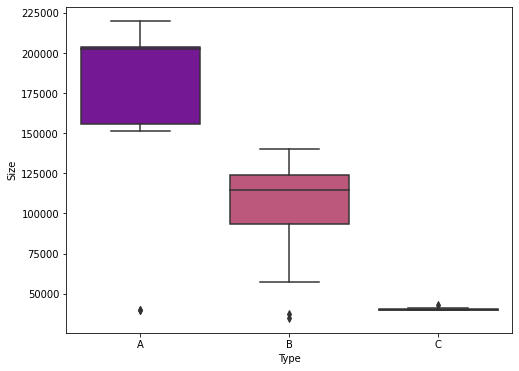

In [15]:
# boxplot for sizes of types of stores
store_type = pd.concat([df_stores['Type'], df_stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type, palette = 'plasma')

## 4.4 Size Mean by Type Store

In [16]:
custom_aggregation = {}
custom_aggregation['Size'] = 'mean'
data0 = df_stores.groupby('Type').agg(custom_aggregation)
data0.columns = ['Size']
data0['Type'] = data0.index

fig = px.bar(data0, x='Type', y='Size', color='Type')
fig['layout'].update(height=400, width=550, title='Size(Mean) of Type Store')
fig.show();

##4.5 Store Count by Type Store

In [28]:
custom_aggregation = {}
custom_aggregation["Store"] = "count"

data_stores = df_stores.groupby("Type").agg(custom_aggregation)
data_stores.columns = ["Store Count"]
data_stores['Type'] = data_stores.index

fig = px.bar(data_stores, x='Type', y="Store Count", color="Type")
fig['layout'].update(height=400, width=550, title='Count of Store Based on Type Store')
fig.show();

#5. Features Analysis

##5.1 Check missing values for each column

We see that there are some missing values for MarkDown 1 to MarkDown5, Unemployment and CPI.

In [42]:
df_features.isnull().sum().sort_values(ascending = False)

Sales Prediction    0
IsHoliday           0
Unemployment        0
CPI                 0
MarkDown5           0
MarkDown4           0
MarkDown3           0
MarkDown2           0
MarkDown1           0
Fuel_Price          0
Temperature         0
Date                0
Store               0
dtype: int64

In [31]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


##5.2 Convertion: Datetime Format for Modeling

In [43]:
df_features['Date'] = pd.to_datetime(df_features['Date'])

In [44]:
#Getting year, month, day
df_features['Year'] = df_features['Date'].dt.year
df_features['Month'] = df_features['Date'].dt.month
df_features['Day'] = df_features['Date'].dt.day

In [45]:
#Equidistance Date

data_features = df_features.sort_values(by='Date')
data_features['Time_Interval'] = data_features.Date - data_features.Date.shift(1)
data_features[['Date', 'Time_Interval']].head()

print(f"{data_features['Time_Interval'].value_counts().sort_values(ascending=False)}")

0 days     2697
28 days      35
7 days       20
21 days       6
Name: Time_Interval, dtype: int64


In [35]:
#Date Interval 
df_features['Date'].min(), df_features['Date'].max()

(Timestamp('2010-01-10 00:00:00'), Timestamp('2013-12-07 00:00:00'))

##5.3 Montly Consumer Price Index (CPI)


Through Investopedia, CPI is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as:

* Transportation
* Food
* Medical Care

It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them.



In [37]:
fig = make_subplots(rows = 1, cols = 1)

custom_aggregation = {}
custom_aggregation["CPI"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["CPI"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['CPI'].tolist()
y_ = data_features['CPI'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'CPI'), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers',name = 'Interpolate CPI'), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Monthly Consumer Price Index')
fig.show();

###Observations:
Monthly Consumer Price Index (CPI) is increasing every month.

##5.4 Monthly Unemplyment Index Average

In [38]:
fig = make_subplots(rows = 1, cols = 1)

custom_aggregation = {}
custom_aggregation["Unemployment"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["Unemployment"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['Unemployment'].tolist()
y_ = data_features['Unemployment'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Unemployment', line = dict(color = 'firebrick', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate Unemployment'), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Monthly Unemployment Index')
fig.show()

###Observations:

Unemployment behaviour is decrease every month.

##5.5 Temperature Monthly Behaviour

In [39]:
fig = make_subplots(rows = 1,  cols = 1)

custom_aggregation = {}
custom_aggregation["Temperature"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["Temperature"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['Temperature'].tolist()
y_ = data_features['Temperature'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Temperature', line = dict(color = 'green', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_,mode = 'markers', name = 'Interpolate Temperature'), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Monthly Temperature')
fig.show();

###Observations
Temperatures vary each year:

 * The Highest peak in May - August 
 * The Lowest in Nov - Feb

##5.6 Monthly Fuel Price

In [40]:
fig = make_subplots(rows = 1, cols = 1)

custom_aggregation = {}
custom_aggregation["Fuel_Price"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["Fuel_Price"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['Fuel_Price'].tolist()
y_ = data_features['Fuel_Price'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Fuel_Price', line = dict(color = 'pink', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate Fuel_Price'), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Monthly Fuel Price')
fig.show();

###Observations:
Fuel price trends to increase every month

##5.7 Monthly Markdown Behaviour

###5.7.1 Markdown 1

In [43]:
fig = make_subplots(rows=2, cols=1)

custom_aggregation = {}
custom_aggregation["MarkDown1"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["MarkDown1"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['MarkDown1'].tolist()
y_ = data_features['MarkDown1'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'MarkDown1', line = dict(color = 'darkorchid', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate MarkDown1'), 1, 1)

#-----------------------------------------------------------------------------------------------------

data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Profit Sales', line = dict(color = 'darkgreen', width = 2)), 1, 1)

#-----------------------------------------------------------------------------------------------------

# Crosstabbing
df_features = df_features.reset_index(drop=True)
feature = ["IsHoliday", 'Date']
data_features = pd.crosstab(df_features[feature[0]], df_features[feature[1]]).T
data_features['Date_'] = data_features.index
data_features.columns = ["Not Holiday", 'Is Holiday', 'Date_']

# Is Holiday
feature = ["Is Holiday", 'Date_']
data_holiday = pd.crosstab(data_features[feature[0]], data_features[feature[1]]).T
data_holiday['Date_'] = data_holiday.index
data_holiday.columns = ["No", 'Yes', 'Date_']

custom_aggregation = {}
custom_aggregation["No"] = "sum"
custom_aggregation["Yes"] = "sum"
data_holiday = data_holiday.resample('M').agg(custom_aggregation)
data_holiday['Date_'] = data_holiday.index

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['Yes'], name='Is Holiday'), 2, 1)

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['No'], name = 'Not Holiday'), 2, 1)

fig['layout'].update(height = 700, width = 900, title = 'Monthly MarkDown1')
fig.show();

####Observations

* February - March 2012: The highest amount of markdown but in that time there is no special week, for this reason the sales tends to stagnate. 

* In Oct, Nov, Dec: have 1 specal week but there is no markdown on that time.

###5.7.2 Markdown 2

In [45]:
fig = make_subplots(rows = 2, cols = 1)

custom_aggregation = {}
custom_aggregation["MarkDown2"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["MarkDown2"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['MarkDown2'].tolist()
y_ = data_features['MarkDown2'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'MarkDown2', line = dict(color = 'turquoise', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate MarkDown2'), 1, 1)

#-----------------------------------------------------------------------------------------------------

data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y,name = 'Profit Sales',line = dict(color = 'darkgreen', width = 2)), 1, 1)


#-----------------------------------------------------------------------------------------------------

# Crosstabbing
df_features = df_features.reset_index(drop=True)
feature = ["IsHoliday", 'Date']
data_features = pd.crosstab(df_features[feature[0]], df_features[feature[1]]).T
data_features['Date_'] = data_features.index
data_features.columns = ["Not Holiday", 'Is Holiday', 'Date_']

# Is Holiday
feature = ["Is Holiday", 'Date_']
data_holiday = pd.crosstab(data_features[feature[0]], data_features[feature[1]]).T
data_holiday['Date_'] = data_holiday.index
data_holiday.columns = ["No", 'Yes', 'Date_']

custom_aggregation = {}
custom_aggregation["No"] = "sum"
custom_aggregation["Yes"] = "sum"
data_holiday = data_holiday.resample('M').agg(custom_aggregation)
data_holiday['Date_'] = data_holiday.index

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['Yes'], name = 'Is Holiday'), 2, 1)

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['No'], name = 'Not Holiday'), 2, 1)

fig['layout'].update(height = 700, width = 900, title = 'Monthly MarkDown2')
fig.show();

####Observations

* Nov - Dec 2011:  there are lots of special week, and the markdown also high. The sales experienced a significant increase at that time.

###5.7.3 Markdown 3

In [48]:
fig = make_subplots(rows = 2, cols = 1)

custom_aggregation = {}
custom_aggregation["MarkDown3"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["MarkDown3"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['MarkDown3'].tolist()
y_ = data_features['MarkDown3'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'MarkDown3', line = dict(color = 'peru', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate MarkDown3'), 1, 1)

#-----------------------------------------------------------------------------------------------------

data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Profit Sales', line = dict(color = 'darkgreen', width = 2)), 1, 1)


#-----------------------------------------------------------------------------------------------------

# Crosstabbing
df_features = df_features.reset_index(drop=True)
feature = ["IsHoliday", 'Date']
data_features = pd.crosstab(df_features[feature[0]], df_features[feature[1]]).T
data_features['Date_'] = data_features.index
data_features.columns = ["Not Holiday", 'Is Holiday', 'Date_']

# Is Holiday
feature = ["Is Holiday", 'Date_']
data_holiday = pd.crosstab(data_features[feature[0]], data_features[feature[1]]).T
data_holiday['Date_'] = data_holiday.index
data_holiday.columns = ["No", 'Yes', 'Date_']

custom_aggregation = {}
custom_aggregation["No"] = "sum"
custom_aggregation["Yes"] = "sum"
data_holiday = data_holiday.resample('M').agg(custom_aggregation)
data_holiday['Date_'] = data_holiday.index

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['Yes'], name = 'Is Holiday'), 2, 1)

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['No'], name = 'Not Holiday'), 2, 1)

fig['layout'].update(height=700, width=900, title = 'Monthly MarkDown3')
fig.show();

###Observations

* November 2011 and November 2012: there're only 2 significant peaks, besides in that month there's also a special week

* December 2011 sales increased significantly

###5.7.4 Markdown 4

In [50]:
fig = make_subplots(rows = 2, cols = 1)

custom_aggregation = {}
custom_aggregation["MarkDown4"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["MarkDown4"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['MarkDown4'].tolist()
y_ = data_features['MarkDown4'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'MarkDown4', line = dict(color = 'rosybrown', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate MarkDown4'), 1, 1)

#-----------------------------------------------------------------------------------------------------

data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Profit Sales', line = dict(color = 'darkgreen', width = 2)), 1, 1)


#-----------------------------------------------------------------------------------------------------

# Crosstabbing
df_features = df_features.reset_index(drop=True)
feature = ["IsHoliday", 'Date']
data_features = pd.crosstab(df_features[feature[0]], df_features[feature[1]]).T
data_features['Date_'] = data_features.index
data_features.columns = ["Not Holiday", 'Is Holiday', 'Date_']

# Is Holiday
feature = ["Is Holiday", 'Date_']
data_holiday = pd.crosstab(data_features[feature[0]], data_features[feature[1]]).T
data_holiday['Date_'] = data_holiday.index
data_holiday.columns = ["No", 'Yes', 'Date_']

custom_aggregation = {}
custom_aggregation["No"] = "sum"
custom_aggregation["Yes"] = "sum"
data_holiday = data_holiday.resample('M').agg(custom_aggregation)
data_holiday['Date_'] = data_holiday.index

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['Yes'], name = 'Is Holiday'), 2, 1)

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['No'], name = 'Not Holiday'), 2, 1)

fig['layout'].update(height = 700, width = 900, title = 'Monthly MarkDown4')
fig.show();

####Observations

* February to March 2011: The highest markdown, but in that time there is no special week

###5.7.5 Markdown 5

In [51]:
fig = make_subplots(rows = 2, cols = 1)

custom_aggregation = {}
custom_aggregation["MarkDown5"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["MarkDown5"]
data_features['Date'] = data_features.index

x = data_features['Date'].tolist()
y = data_features['MarkDown5'].tolist()
y_ = data_features['MarkDown5'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'MarkDown5', line = dict(color = 'navy', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, mode = 'markers', name = 'Interpolate MarkDown5'), 1, 1)

#-----------------------------------------------------------------------------------------------------

data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Profit Sales', line = dict(color = 'darkgreen', width = 2)), 1, 1)

#-----------------------------------------------------------------------------------------------------

# Crosstabbing
df_features = df_features.reset_index(drop=True)
feature = ["IsHoliday", 'Date']
data_features = pd.crosstab(df_features[feature[0]], df_features[feature[1]]).T
data_features['Date_'] = data_features.index
data_features.columns = ["Not Holiday", 'Is Holiday', 'Date_']

# Is Holiday
feature = ["Is Holiday", 'Date_']
data_holiday = pd.crosstab(data_features[feature[0]], data_features[feature[1]]).T
data_holiday['Date_'] = data_holiday.index
data_holiday.columns = ["No", 'Yes', 'Date_']

custom_aggregation = {}
custom_aggregation["No"] = "sum"
custom_aggregation["Yes"] = "sum"
data_holiday = data_holiday.resample('M').agg(custom_aggregation)
data_holiday['Date_'] = data_holiday.index

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['Yes'], name = 'Is Holiday'), 2, 1)

fig.add_trace(go.Bar(x = data_holiday['Date_'], y = data_holiday['No'], name = 'Not Holiday'), 2, 1)

fig['layout'].update(height = 700, width = 900, title = 'Monthly MarkDown5')
fig.show();

####Observations

* The Markdown 5 is lower than others, but behaviour doesn't change.

#6. Sales Analysis

In [52]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


##6.1 Overall Monthly Lose sales

In [54]:
fig = make_subplots(rows = 1, cols = 1)

data_sales = df_sales.loc[df_sales['Weekly_Sales'] < 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Lose Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Lose Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Lose Sales', line = dict(color = 'purple', width = 2)), 1, 1)

fig['layout'].update(height=500, width=900, title='Overall Monthly Lose Sales')
fig.show();

##6.2 Overall Monthly Profit Sales

In [57]:
fig = make_subplots(rows = 1, cols = 1)

data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Profit Sales', line = dict(color = 'red', width = 2)), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Overall Monthly Profit Sales')
fig.show()

##6.3 Local Sales by Store

In [55]:
data_sales = df_sales.loc[df_sales['Weekly_Sales'] < 0]
data_sales = data_sales.rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_features = data_sales.groupby("Store").agg(custom_aggregation)
data_features.columns = ["Lose Sales"]
data_features['Store'] = data_features.index
data_features['Lose Sales'] = abs(data_features['Lose Sales'])

Store = data_features['Store'].tolist()
Sales = data_features['Lose Sales'].tolist()

fig = px.pie(data_features, values = Sales, names = Store)
fig.update_traces(textposition='inside')
fig['layout'].update(height = 500, width = 700, title = 'Lose Sales by Store')
fig.show();

##6.4 Local Sales by Department

In [56]:
data_sales = df_sales.loc[df_sales['Weekly_Sales'] < 0]
data_sales = data_sales.rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_features = data_sales.groupby("Dept").agg(custom_aggregation)
data_features.columns = ["Lose Sales"]
data_features['Dept'] = data_features.index
data_features['Lose Sales'] = abs(data_features['Lose Sales'])

Dept = data_features['Dept'].tolist()
Sales = data_features['Lose Sales'].tolist()

fig = px.pie(data_features, values=Sales, names=Dept)
fig.update_traces(textposition='inside')
fig['layout'].update(height = 500, width = 700, title = 'Lose Sales by Department')
fig.show();

##6.5 Profit Sales by Store

In [58]:
data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
data_sales = data_sales.rename(columns = {'Date':'Date_'}, inplace = False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_features = data_sales.groupby("Store").agg(custom_aggregation)
data_features.columns = ["Profit Sales"]
data_features['Store'] = data_features.index

Store = data_features['Store'].tolist()
Sales = data_features['Profit Sales'].tolist()

fig = px.pie(data_features, values = Sales, names = Store)
fig.update_traces(textposition='inside')
fig['layout'].update(height = 500, width = 700, title = 'Profit Sales by Store')
fig.show();

##6.6 Profit sales by Department

In [59]:
data_sales = df_sales.loc[df_sales['Weekly_Sales'] > 0]
data_sales = data_sales.rename(columns={'Date':'Date_'}, inplace=False)

custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_features = data_sales.groupby("Dept").agg(custom_aggregation)
data_features.columns = ["Profit Sales"]
data_features['Dept'] = data_features.index

Dept = data_features['Dept'].tolist()
Sales = data_features['Profit Sales'].tolist()

fig = px.pie(data_features, values = Sales, names = Dept)
fig.update_traces(textposition = 'inside')

fig['layout'].update(height=500, width=700, title='Profit Sales by Dept')
fig.show()

##6.7 Good and Bad Store Performance based on Monthly Profit Sales

In [62]:
fig = make_subplots(rows = 1, cols = 1)

# Bad performance store
data_sales = df_sales.loc[df_sales['Store'] == 28]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

# Good performance store
data_sales = df_sales.loc[df_sales['Store'] == 20]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x_ = data_features['Date_'].tolist()
y_ = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Store 28 (Bad Perf.)',line = dict(color = 'purple', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x_, y = y_, name = 'Store 20 (Good Perf.)',line = dict(color = 'darkgreen', width = 2)), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Compared Good and Bad Store Performance based on Monthly Profit Sales')
fig.show();

###Observations

* The worst performance is Store number 28 
* The best performance is Store number 20 
* For Store number 28 have size 3.52% and Store number 20 3.48%: size of the two store isn't too different, but the difference in sales about 10K

##6.8 Good and Bad Dept Performance based on Monthly Profit Sales


In [63]:
fig = make_subplots(rows = 1, cols = 1)

# Bad performance store
data_sales = df_sales.loc[df_sales['Dept'] == 32]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales'].tolist()

# Good performance store
data_sales = df_sales.loc[df_sales['Dept'] == 92]
custom_aggregation = {}
custom_aggregation["Weekly_Sales"] = "mean"
data_sales = data_sales.set_index(pd.DatetimeIndex(data_sales['Date']))
data_features = data_sales.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales"]
data_features['Date_'] = data_features.index

x_ = data_features['Date_'].tolist()
y_ = data_features['Monthly Profit Sales'].tolist()

fig.add_trace(go.Scatter(x = x, y = y,name = 'Dept 32 (Bad Perf.)',line = dict(color = 'purple', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x_, y = y_,name = 'Dept 92 (Good Perf.)',line = dict(color = 'darkgreen', width = 2)), 1, 1)

fig['layout'].update(height = 500, width = 900, title = 'Compared Good and Bad Dept Performance based on Monthly Profit Sales')
fig.show();

###Observations

* Dept number 32 and 92: have very significant different in sales, which is about 50K

#7. Other Analysis

##7.1 Weekly sales by types of stores: Type 1, Type 2 and Type 3

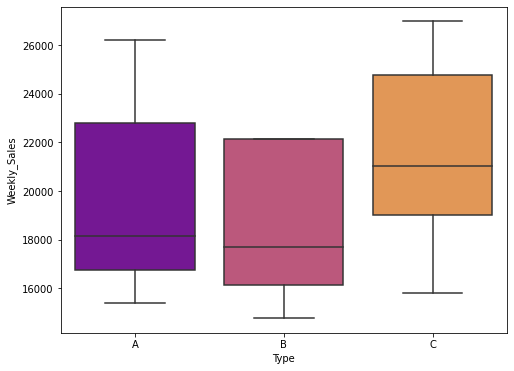

In [16]:
store_sale = pd.concat([df_stores['Type'], df_sales_store['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False, palette = 'plasma')

##7.2 Weekly Sales on Holidays and non-Holidays

In [17]:
holiday = df_sales_store['Weekly_Sales'].loc[df_sales_store['IsHoliday']== True] # Weekly Sales in Holidays
non_holiday = df_sales_store['Weekly_Sales'].loc[df_sales_store['IsHoliday']== False] #Weekly Sales in Non-holidays.

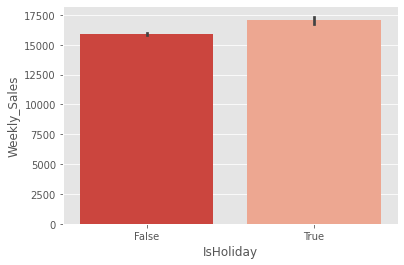

In [58]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df_sales_store, palette =('Reds_r'))

##7.3 Weekly Sales by Dept and Holidays

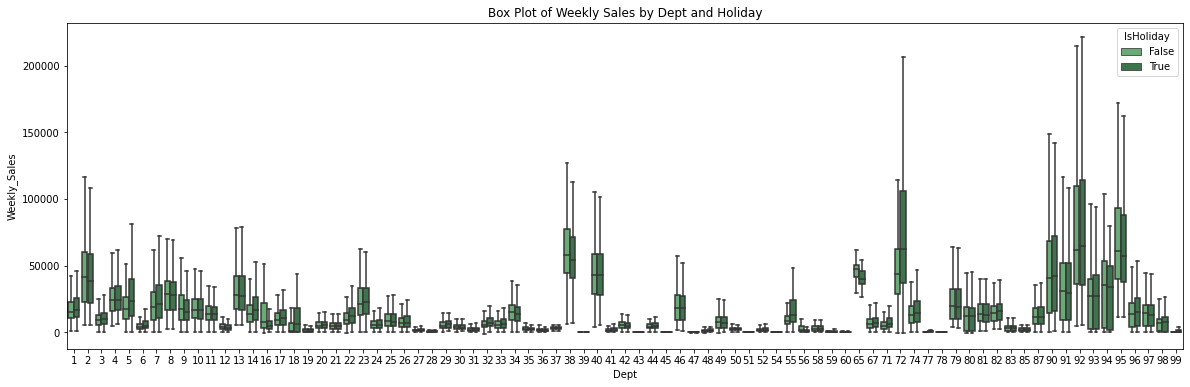

In [18]:
df_month_holi = pd.concat([df_sales_store['Dept'], df_sales_store['Weekly_Sales'], df_sales_store['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Dept and Holiday')
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=df_month_holi, showfliers=False, hue='IsHoliday', palette = 'Greens_d')

##7.4 Correlations among features

*   Correlation: Bivariate Analysis that measures the strength of association between two variables and the direction of the relationship
*   Correlation Coefficient (+1, -1): value goes towards o, the relationship will be weaker.
*   (+) sign indicates a positive relationship
*   (-) sign indicates a negative relationship

A Statistic level measure three types of correlations:

1.   Pearson Correlation
2.   Kendall Rank Correlation
3.   Spearman Correlation







[]

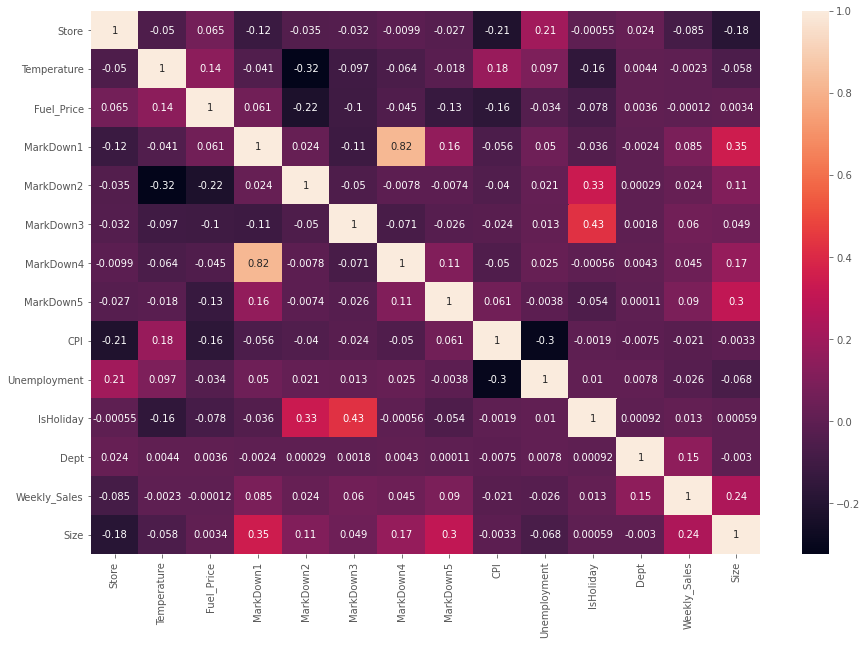

In [67]:
# Plotting correlation between all important features
corr = df_sales_features.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

##7.5 Weekly sales identifies negative values



*   Null values present merged dataframe
*   Replace null values with zeros



In [11]:
df_new = df_new.fillna(0)

In [12]:
df_new.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [21]:
df_new.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### Weekly sales have negative values: -4988.940000

*   It skipped those rows having negative weekly sales




In [22]:
df_new = df_new[df_new['Weekly_Sales'] >= 0]



*   Correlation Matrix



[]

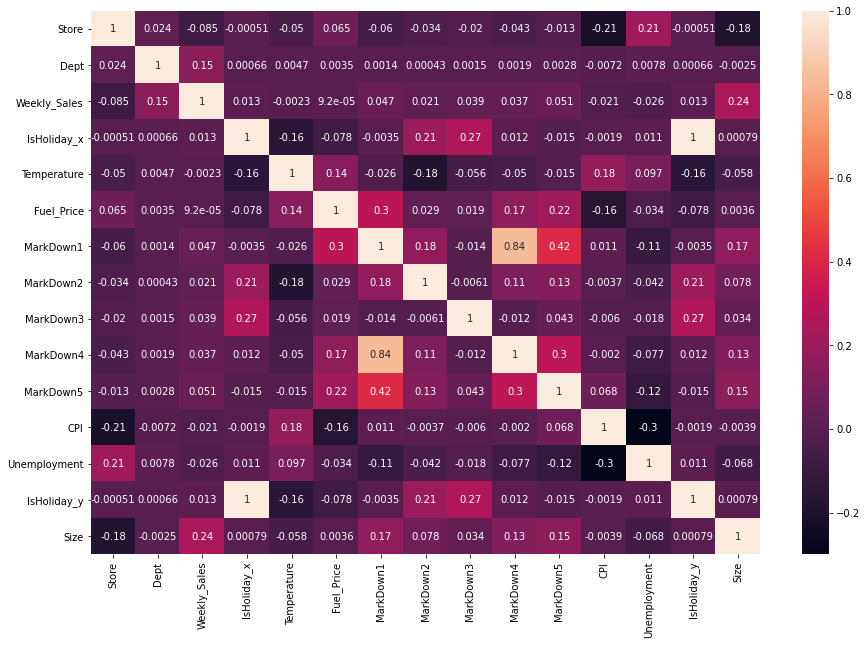

In [23]:
# Plotting correlation between all important features
corr = df_new.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

#8. Time Series Forescasting Models

Each date of the weekly sales with respect:

*   Stores
*   Departments

Apply some popular TSFM:
1.   Auto ARIMA Model (Auto Regressive Integrated Moving Average): projects the future values of a series based entirely on its own inertia
2.   Holt-Winters Model







In [24]:
df_new.Date = pd.to_datetime(df_new.Date, format = '%d/%m/%Y' )
df_new.index = df_new.Date
df_new = df_new.drop('Date', axis=1)

In [25]:
df_new = df_new.resample('MS').mean() # Resampling the time series data with month starting first.

In [26]:
# Train-Test splitting of time series data
train_data = df_new[:int(0.7*(len(df_new)))]
test_data = df_new[int(0.7*(len(df_new))):]

In [27]:
# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

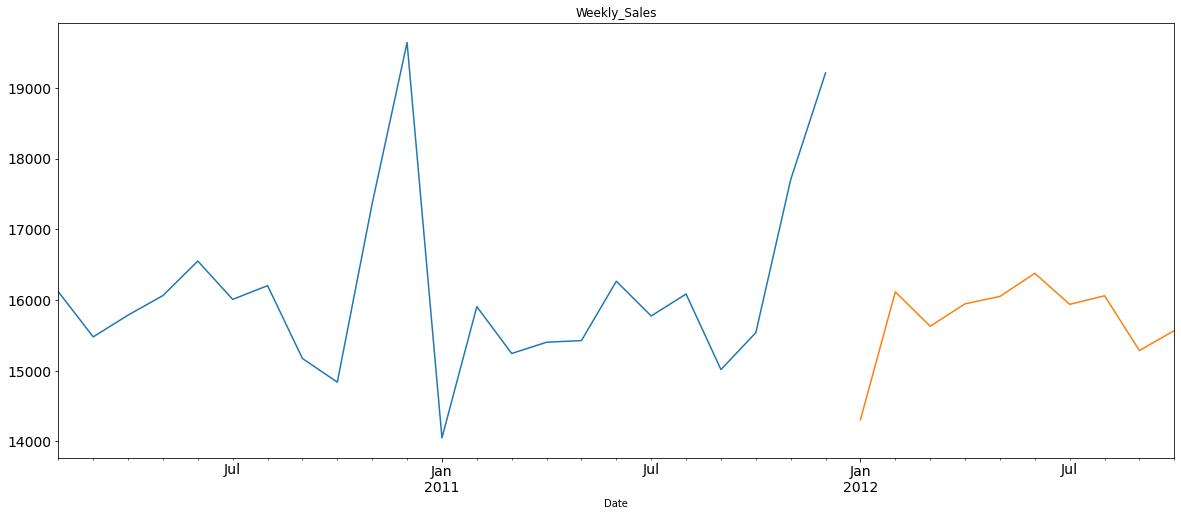

In [28]:
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_new['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.173916935101529
p-value: 0.0007291844915316654
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#9. **Machine Learning Models**

*   Sales Prediction through:



1.   Linear Regression
2.   K Nearest Neighbors
3.   Rigde Regression
4.   Lasso Regression
5.   Decision Tree Regression
6.   Random Forest Regression
7.   ExtraTrees Regression
8.   XGBoost Regression

Every model implement steps to apply models:


*   Preprocessing columns is in string format converting to numeric data type
*   Define parameters
*   Fit the model on training data
*   Hyper parameter-tune the parameters
*   Train the model on tuned parameters
*   Get the Weighted Mean Absolute Error (MAE)










In [8]:
data_fss = df_stores.merge(df_features).merge(df_sales)

In [9]:
test = data_fss.copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
test.shape

(421570, 16)

In [11]:
features = test.columns.values.tolist()

for col in features:
    test[col] = test[col].interpolate()

In [12]:
#missing values columns
test.isnull().sum().sort_values(ascending = False) 

MarkDown5       6587
MarkDown4       6587
MarkDown3       6587
MarkDown2       6587
MarkDown1       6587
Weekly_Sales       0
Dept               0
IsHoliday          0
Unemployment       0
CPI                0
Fuel_Price         0
Temperature        0
Date               0
Size               0
Type               0
Store              0
dtype: int64

In [13]:
test.dropna(inplace=True)

In [16]:
test.head(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
6587,1,A,151315,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54
6588,1,A,151315,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47
6589,1,A,151315,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64
6590,1,A,151315,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52
6591,1,A,151315,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65


In [15]:
print('Dupplicate entries: {}'.format(test.duplicated().sum()))

Dupplicate entries: 0


In [17]:
test = test.drop('Date', axis=1, inplace=False)

In [18]:
def nunique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)

In [19]:
nunique_counts(test)

Store :  45
Type :  3
Size :  40
Temperature :  3488
Fuel_Price :  892
MarkDown1 :  266578
MarkDown2 :  305105
MarkDown3 :  279487
MarkDown4 :  281959
MarkDown5 :  265843
CPI :  2053
Unemployment :  342
IsHoliday :  2
Dept :  81
Weekly_Sales :  354138


###Categorical Variables:

* Apply Label Encoding:



1.   Type: 0, 1 and 2
2.   Holiday: 0 and 1


In [20]:
le = LabelEncoder()
le.fit(test['Type'])

test['Type'] = le.transform(test['Type'])

l = [i for i in range(3)]
dict(zip(list(le.classes_), l))

{'A': 0, 'B': 1, 'C': 2}

In [21]:
le.fit(test['IsHoliday'])

test['IsHoliday'] = le.transform(test['IsHoliday'])

l = [i for i in range(2)]
dict(zip(list(le.classes_), l))

{False: 0, True: 1}

###Normalization:

In [23]:
def normalize_col(data):
    for col in test.columns.values.tolist():
        scaler = MinMaxScaler()
        data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
    return data

test = normalize_col(test)
test.head()

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
6587,0.0,0.0,0.630267,0.598532,0.413327,0.117124,0.0609,0.001724,0.035664,0.059199,0.90872,0.382116,0.0,0.000000,0.033919
6588,0.0,0.0,0.630267,0.598532,0.413327,0.117124,0.0609,0.001724,0.035664,0.059199,0.90872,0.382116,0.0,0.010204,0.071517
6589,0.0,0.0,0.630267,0.598532,0.413327,0.117124,0.0609,0.001724,0.035664,0.059199,0.90872,0.382116,0.0,0.020408,0.021414
6590,0.0,0.0,0.630267,0.598532,0.413327,0.117124,0.0609,0.001724,0.035664,0.059199,0.90872,0.382116,0.0,0.030612,0.059900
6591,0.0,0.0,0.630267,0.598532,0.413327,0.117124,0.0609,0.001724,0.035664,0.059199,0.90872,0.382116,0.0,0.040816,0.051557


In [24]:
test.corr()['Weekly_Sales'].sort_values(ascending=False)[:8]

Weekly_Sales    1.000000
Size            0.245900
Dept            0.144387
MarkDown1       0.110701
MarkDown2       0.103349
MarkDown4       0.074705
MarkDown5       0.072457
MarkDown3       0.041821
Name: Weekly_Sales, dtype: float64

###Modeling with Logistic Regression

Parameters:

* Data: 2010-01-10 until 2012-12-10
* Missing values: Normally drop it, or fill it with 0. In this case, Interpolate
* Label encoding categorical data
* Selected feature for modelling

In [25]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [26]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

###Model with selected features



*   Size
*   Dept
*   MarkDown1
*   MarkDown2
*   MarkDown3
*   MarkDown4
*   MarkDown5



In [28]:
train_data, test_data = train_test_split(test, train_size = 0.8, random_state = 3)

features = ['Size','Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

lr1 = LinearRegression()
lr1.fit(train_data[features],train_data['Weekly_Sales'])

pred1 = lr1.predict(test_data[features])

#Metrics Ordinal Regression Problem
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Weekly_Sales'], pred1)),'.3f'))
rtrcm1 = float(format(lr1.score(train_data[features], train_data['Weekly_Sales']),'.3f'))
artrcm1 = float(format(adjustedR2(lr1.score(train_data[features], train_data['Weekly_Sales']), train_data.shape[0], len(features)),'.3f'))
rtecm1 = float(format(lr1.score(test_data[features], test_data['Weekly_Sales']),'.3f'))
artecm1 = float(format(adjustedR2(lr1.score(test_data[features], test_data['Weekly_Sales']), test_data.shape[0], len(features)),'.3f'))

#Cross Validation
cv1 = float(format(cross_val_score(lr1, test[features], test['Weekly_Sales'],cv = 5).mean(),'.3f'))

#Evaluation model
r = evaluation.shape[0]
evaluation.loc[r] = ['Linear Regression', 'Selected Features', rmsecm1, rtrcm1, artrcm1, rtecm1, artecm1, cv1]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending = False)
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Linear Regression,Selected Features,0.031,0.084,0.084,0.082,0.082,0.07


###Model with all features



*   Weekly_sales
*   Type
*   Size
*   Dept



In [31]:
features = test.drop(['Weekly_Sales','Type', 'Size', 'Dept'], axis=1).columns.values.tolist()

lr2 = LinearRegression()
lr2.fit(train_data[features],train_data['Weekly_Sales'])

pred2 = lr2.predict(test_data[features])

#Metrics Ordinal Regression Problem
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['Weekly_Sales'],pred2)),'.3f'))
rtrcm2 = float(format(lr2.score(train_data[features],train_data['Weekly_Sales']),'.3f'))
artrcm2 = float(format(adjustedR2(lr2.score(train_data[features],train_data['Weekly_Sales']),train_data.shape[0],len(features)),'.3f'))
rtecm2 = float(format(lr2.score(test_data[features],test_data['Weekly_Sales']),'.3f'))
artecm2 = float(format(adjustedR2(lr2.score(test_data[features],test_data['Weekly_Sales']),test_data.shape[0],len(features)),'.3f'))

#Cross Validation
cv2 = float(format(cross_val_score(lr2,test[features],test['Weekly_Sales'],cv=5).mean(),'.3f'))

#Evaluation model
r = evaluation.shape[0]
evaluation.loc[r] = ['Linear Regression','All Features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Linear Regression,Selected Features,0.031,0.084,0.084,0.082,0.082,0.070
1,Linear Regression,All Features,0.032,0.029,0.029,0.027,0.027,0.005


###Display Modelling

In [32]:
def model_performance_sc_plot(predictions, labels, title):
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg", height=7)
    plt.plot([min_val, max_val], [min_val, max_val], 'm--')
    plt.title(title, fontsize=9)
    plt.show()

###Logistic Regression with selected features

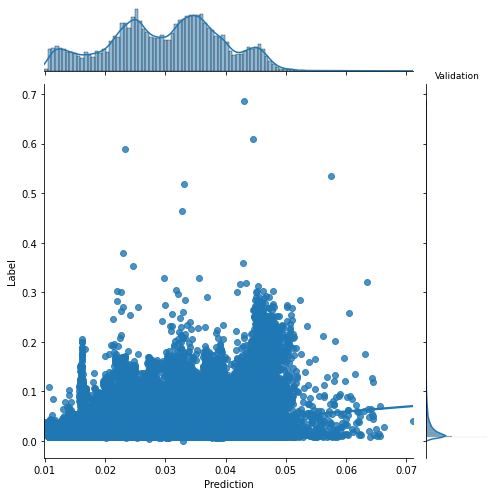

In [33]:
model_performance_sc_plot(pred1, test_data['Weekly_Sales'], 'Validation')

###Logistic Regression with all features

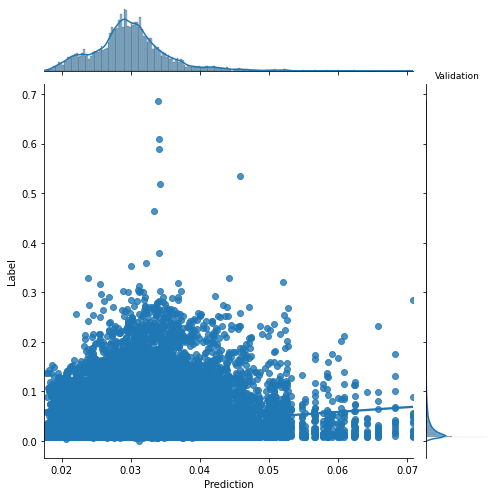

In [34]:
model_performance_sc_plot(pred2, test_data['Weekly_Sales'], 'Validation')

#Month Sales Prediction

In [35]:
feature = df_features.columns.values.tolist()

for col in feature:
    df_features[col] = df_features[col].interpolate()

In [36]:
df_features.dropna(inplace=True)

In [37]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False


###Selected date

In [38]:
df_features['Date'].min(), df_features['Date'].max()

('01/02/2013', '31/12/2010')

In [39]:
df_features = df_features.loc[df_features['Date'] >= '2012-12-10 00:00:00']

In [40]:
df_features['Sales Prediction'] = lr2.predict(df_features[features])

In [41]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Sales Prediction
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,2535.607221
98,1,23/12/2011,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,219.357722,7.866,False,241.288434
99,1,30/12/2011,44.55,3.129,5762.10,46011.38,260.36,983.65,4735.78,219.535990,7.866,True,2041.999957
103,1,27/01/2012,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,7.348,False,132.534462
107,1,24/02/2012,57.25,3.555,9349.61,7556.01,3.20,1219.92,8143.59,220.636902,7.348,False,938.856682


##Model Sales Prediction

In [47]:
fig = make_subplots(rows = 1, cols = 1)

custom_aggregation = {}
custom_aggregation["Sales Prediction"] = "mean"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales Prediction"]
data_features['Date_'] = data_features.index

x = data_features['Date_'].tolist()
y = data_features['Monthly Profit Sales Prediction'].tolist()
y_ = data_features['Monthly Profit Sales Prediction'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x, y = y, name = 'Avg. Sales', line = dict(color ='black', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x, y = y_, name = ' ', line = dict(color ='black', width = 2)), 1, 1)
#--------------------------------------------------------------------------------------------------------

custom_aggregation = {}
custom_aggregation["Sales Prediction"] = "min"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales Prediction"]
data_features['Date_'] = data_features.index

x_min = data_features['Date_'].tolist()
y_min = data_features['Monthly Profit Sales Prediction'].tolist()
y_min_ = data_features['Monthly Profit Sales Prediction'].interpolate().tolist()


fig.add_trace(go.Scatter(x = x_min, y = y_min, name = 'Pesimistic Sales', line = dict(color = 'purple', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x_min, y = y_min_, name =' ', line = dict(color = 'purple', width=2)), 1, 1)
#--------------------------------------------------------------------------------------------------------

custom_aggregation = {}
custom_aggregation["Sales Prediction"] = "max"
df_features = df_features.set_index(pd.DatetimeIndex(df_features['Date']))
data_features = df_features.resample('M').agg(custom_aggregation)
data_features.columns = ["Monthly Profit Sales Prediction"]
data_features['Date_'] = data_features.index

x_max = data_features['Date_'].tolist()
y_max = data_features['Monthly Profit Sales Prediction'].tolist()
y_max_ = data_features['Monthly Profit Sales Prediction'].interpolate().tolist()

fig.add_trace(go.Scatter(x = x_max, y = y_max, name = 'Optimistic Sales', line = dict(color = 'darkgreen', width = 2)), 1, 1)
fig.add_trace(go.Scatter(x = x_max, y = y_max_, name = ' ', line = dict(color = 'darkgreen', width = 2)), 1, 1)
#--------------------------------------------------------------------------------------------------------

fig['layout'].update(height = 500, width = 900, title = 'Monthly Sales Prediction')
fig.show();

###Observations

*   Range between 2012-12-10 until 2013-12-07
*   The highest peak on August 2013
*   Behaviour month sales peak are on December, on the other hand our model predict December decrease sales due to interpolation Markdown